In [1]:
## IMPORTS ##
import numpy as np
from pathlib import Path
import yt
import matplotlib.pyplot as plt
import sys
import pwlf
sys.path.append("../FLASH")

from fitting_functions import Ray 

yt : [INFO     ] 2025-07-21 17:44:55,702 Loading plugins from /home/dschneidinger/.config/yt/my_plugins.py
yt : [INFO     ] 2025-07-21 17:44:55,762 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2025-07-21 17:44:55,762 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2025-07-21 17:44:55,763 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2025-07-21 17:44:55,763 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2025-07-21 17:44:55,763 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-07-21 17:44:56,740 xlim = -0.600000 0.600000
yt : [INFO     ] 2025-07-21 17:44:56,740 ylim = -0.075000 1.000000
yt : [INFO     ] 2025-07-21 17:44:56,741 xlim = -0.600000 0.600000
yt : [INFO     ] 2025-07-21 17:44:56,741 ylim = -0.075000 1.000000
yt : [INFO     ] 2025-07-21 17:44:56,742 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800



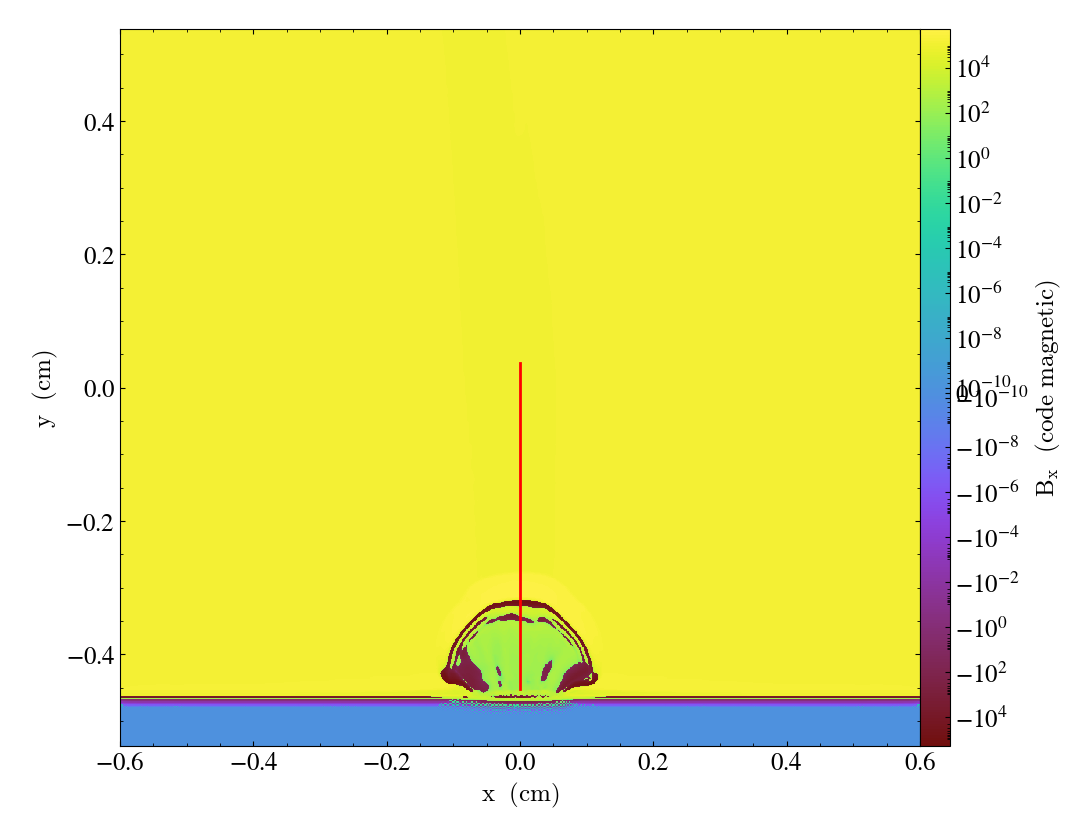

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

In [2]:
## Path to FLASH data. This data was chosen because it's generally a simple setup.
## We want to characterize the fundamental behavior of a pison expanding out into a magnetized background. 
data_path = Path("/mnt/cellar/shared/simulations/FLASH_MagShockZ3D-Trantham_06-2024/MAGON/MagShockZ_hdf5_chk_0005")

# Use the plugin I built for yt to load in FLASH data and split up ion species.
yt.enable_plugins()

ds = yt.load_for_osiris(data_path, rqm_factor = 10)

start_point = (0,0.01,0)
end_point = (0,0.5,0)

lineout = Ray(ds, start_point, end_point)


lineout.show_ray("magx")
fit_result = lineout.fit("magx", degree=6, fit_func="piecewise", plot=True)

'"if(x2 < 580.433, x2*4.37150e-16 + 1.42656e-12, if(x2 < 581.52737, x2*7.14694e+00 + -4.14832e+03, if(x2 < 592.36551, x2*-3.48916e-01 + 2.10726e+02, if(x2 < 727.28831, x2*-1.38999e-03 + 4.86318e+00, if(x2 < 741.17664, x2*-1.75776e-01 + 1.31692e+02, if(x2 < 883.46256, x2*-3.3279e-04 + 1.65769e+00, if(x2 < 1064.53626, x2*1.19239e-03 + 3.10248e-01, if(x2 < 2053.70365, x2*-2.06041e-04 + 1.79893e+00, 1.7989292069905267)))))))),"'

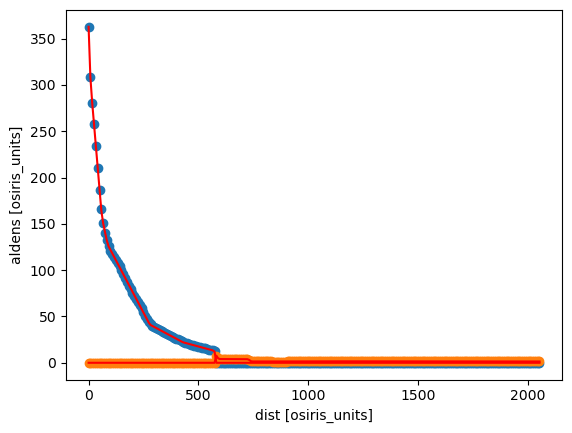

In [ ]:
lineout.fit("sidens", degree=8, fit_func="piecewise", plot=True)
lineout.fit("aldens", degree=8, fit_func="piecewise", plot=True)
# lineout.show_lineout("aldens")

'"if(x2 < 195.90457, x2*2.23825e-05 + 2.99162e-03, if(x2 < 222.00245, x2*1.06840e-05 + 5.28341e-03, if(x2 < 511.89368, x2*1.3744e-05 + 4.6041e-03, if(x2 < 564.23755, x2*-2.55124e-05 + 2.46992e-02, if(x2 < 587.14929, x2*-5.89672e-05 + 4.35757e-02, if(x2 < 615.6171, x2*-3.54106e-05 + 2.97444e-02, if(x2 < 720.38295, x2*-2.01341e-07 + 8.06898e-03, if(x2 < 745.08245, x2*-3.18528e-04 + 2.37386e-01, if(x2 < 935.19503, x2*-2.62766e-07 + 2.52245e-04, if(x2 < 985.26683, x2*8.21325e-07 + -7.61592e-04, if(x2 < 1376.12515, x2*-9.71789e-08 + 1.43379e-04, if(x2 < 1494.23301, x2*6.33073e-08 + -7.74699e-05, if(x2 < 1495.57144, x2*1.89414e-06 + -2.81315e-03, if(x2 < 1508.67585, x2*1.46848e-07 + -1.99961e-04, if(x2 < 2053.70365, x2*1.10944e-07 + -1.45792e-04, -0.00014579242978931615))))))))))))))),"'

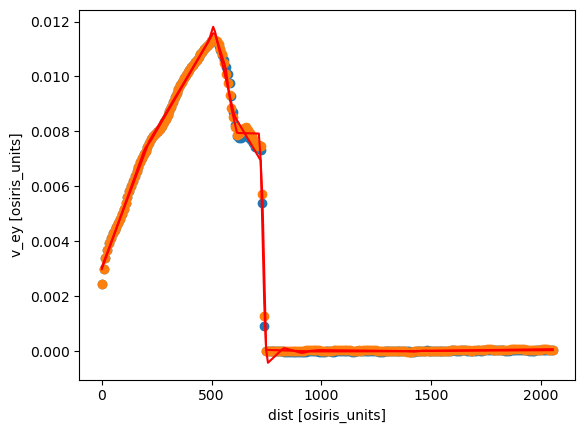

In [ ]:
lineout.fit('v_iy', degree=15, fit_func="piecewise", plot=True)
lineout.fit('v_ey', degree=15, fit_func="piecewise", plot=True)

In [ ]:
lineout.fit('tele', degree=15, fit_func="piecewise", plot=True)

UnboundLocalError: cannot access local variable 'values' where it is not associated with a value